# DATA MINING AND ANALYSIS COURSE PROJECT


# TITLE  : TALKING DATA MOBILE USER DEMOGRAPHICS

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline 
print("Reading the data...")
train=pd.read_csv("/home/ubuntu/5th sem/DMA PROJECT/gender_age_train.csv");
test=pd.read_csv("/home/ubuntu/5th sem/DMA PROJECT/gender_age_test.csv");

train.head()


Populating the interactive namespace from numpy and matplotlib
Reading the data...


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [2]:
test.head()

,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


In [3]:

# Combining into one dataset for cleaning

df_all=pd.concat((train, test), axis=0, ignore_index=True);

In [4]:
train.shape[0]

74645

In [5]:
test.shape[0]

112071

In [6]:
df_all.shape[0]

186716

In [7]:
df_all.head(20)

,age,device_id,gender,group
0,35.0,-8076087639492063270,M,M32-38
1,35.0,-2897161552818060146,M,M32-38
2,35.0,-8260683887967679142,M,M32-38
3,30.0,-4938849341048082022,M,M29-31
4,30.0,245133531816851882,M,M29-31
5,24.0,-1297074871525174196,F,F24-26
6,36.0,236877999787307864,M,M32-38
7,38.0,-8098239495777311881,M,M32-38
8,33.0,176515041953473526,M,M32-38
9,36.0,1596610250680140042,F,F33-42


In [8]:

#to check number of unique device id in the train and test data
print(train.device_id.nunique())
print(test.device_id.nunique())

74645
112071


In [9]:
#Number of records - Number of Unique deviceID must be equal to Zero
#Checking whether the all the device_id in train and test data are unique or no
print(test.shape[0]-test.device_id.nunique())
print(train.shape[0]-train.device_id.nunique())
print(df_all.shape[0]-df_all.device_id.nunique())

0
0
0


In [10]:
#Trying to remove outliers from column 'age'
def remove_outliers(df, column, min_val, max_val):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values <= min_val, col_values >= max_val), np.NaN, col_values)
    return df



# Fixing age column 
#The age value with less than 15 and more than 90 are considered to be outliers
df_all = remove_outliers(df = df_all, column = 'age', min_val = 15, max_val = 90)
df_all['age'].fillna(-1, inplace = True)





/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less_equal
  after removing the cwd from sys.path.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.


In [11]:
df_all.head()

,age,device_id,gender,group
0,35.0,-8076087639492063270,M,M32-38
1,35.0,-2897161552818060146,M,M32-38
2,35.0,-8260683887967679142,M,M32-38
3,30.0,-4938849341048082022,M,M29-31
4,30.0,245133531816851882,M,M29-31


In [12]:
df_all.shape[0]

186716

In [13]:
label_category=pd.read_csv("/home/ubuntu/5th sem/DMA PROJECT/label_categories.csv");

In [14]:
label_category.head(10)

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time
5,6,game-Cutting things
6,7,game-Finding fault
7,8,game-stress reliever
8,9,game-pet
9,10,game-Answer


In [15]:

print(label_category.shape[0])

930


In [16]:

##printing the number of missing values in each column in Label_category.csv
print(label_category.isnull().sum())


label_id    0
category    3
dtype: int64


In [29]:
##removing the rows with missing value(NaN)

label_category.dropna(inplace=True)

In [30]:
label_category.shape[0]

927

In [19]:
import seaborn as sns

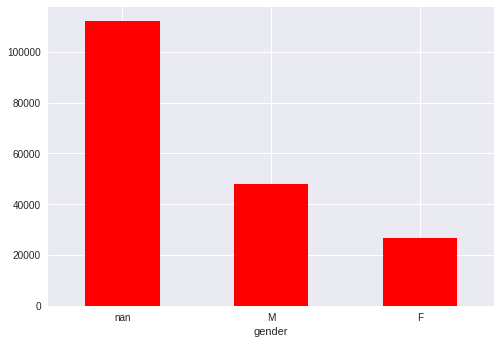

In [20]:
##Display the count of male ,female
df_all.gender.value_counts(dropna=False).plot(kind='bar', color='red', rot=0)
plt.xlabel('gender')

In [21]:

##printing the number of missing values in each column in df_all dataframe..
print(df_all.isnull().sum())


age               0
device_id         0
gender       112071
group        112071
dtype: int64


In [22]:
##removing the rows with missing value(NaN) in df_All data frame....

df_all.dropna(inplace=True)

In [23]:
df_all.shape[0]

74645

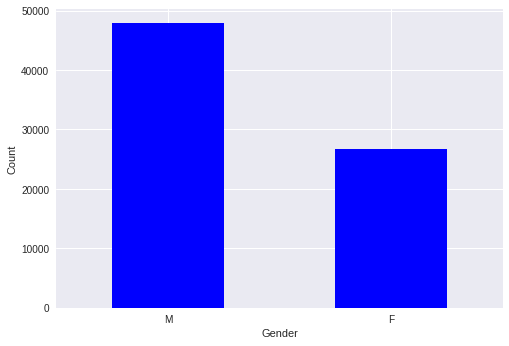

In [24]:
df_all.gender.value_counts(dropna=False).plot(kind='bar', color='blue', rot=0)
plt.xlabel('Gender')
plt.ylabel('Count')

##From the above Graph we can analyse that most of the mobile device users are Male 

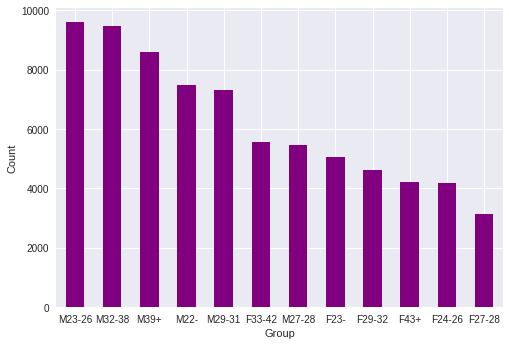

In [25]:
df_all.group.value_counts(dropna=False).plot(kind='bar', color='purple', rot=0)
plt.xlabel('Group')
plt.ylabel('Count')

##From the above Graph we can analyse that most of the mobile device users are Male with age group between 23-26
##Lowest number of mobile device users are Female with age group between 27-28

In [26]:
app_labels=pd.read_csv("/home/ubuntu/5th sem/DMA PROJECT/app_labels.csv")

In [27]:
app_labels.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406
